In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
white_wine = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\BlueBerry Winery\winequality-white.csv', sep=';')

In [3]:
red_wine = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\BlueBerry Winery\winequality-red.csv', sep=';')

In [4]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

In [5]:
display(red_wine.head())
display(white_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [6]:
all_wine = pd.concat([red_wine, white_wine])
display(all_wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


None

In [14]:
comparison = pd.concat([
    red_wine[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].describe(),
    white_wine[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].describe()
], axis=1, keys=["Red Wines Stats", "White Wines Stats"])
display(comparison)

Red Wines Stats                                                 \
       residual sugar total sulfur dioxide    sulphates      alcohol   
count     1599.000000          1599.000000  1599.000000  1599.000000   
mean         2.538806            46.467792     0.658149    10.422983   
std          1.409928            32.895324     0.169507     1.065668   
min          0.900000             6.000000     0.330000     8.400000   
25%          1.900000            22.000000     0.550000     9.500000   
50%          2.200000            38.000000     0.620000    10.200000   
75%          2.600000            62.000000     0.730000    11.100000   
max         15.500000           289.000000     2.000000    14.900000   

                                    White Wines Stats                       \
      volatile acidity      quality    residual sugar total sulfur dioxide   
count      1599.000000  1599.000000       4898.000000          4898.000000   
mean          0.527821     5.636023          6.391415           138.360657   
std           0.179060     0.807569          5.072058            42.498065   
min           0.120000     3.000000          0.600000             9.000000   
25%           0.390000     5.000000          1.700000           108.000000   
50%           0.520000     6.000000          5.200000           134.000000   
75%           0.640000     6.000000          9.900000           167.000000   
max           1.580000     8.000000         65.800000           440.000000   

                                                               
         sulphates      alcohol volatile acidity      quality  
count  4898.000000  4898.000000      4898.000000  4898.000000  
mean      0.489847    10.514267         0.278241     5.877909  
std       0.114126     1.230621         0.100795     0.885639  
min       0.220000     8.000000         0.080000     3.000000  
25%       0.410000     9.500000         0.210000     5.000000  
50%       0.470000    10.400000         0.260000     6.000000  
75%       0.550000    11.400000         0.320000     6.000000  
max       1.080000    14.200000         1.100000     9.000000

Red wine: + sulphates, ++ volatile acidity
White wine: ++ residual sugar (massive max - outlier?), ++ sulfur dioxide, slight + quality

RED investigate: 
citric acid max
residual sugar max
chlorides max
total sulfur dioxide: some above legal limit in EU of 160
sulphates max

([<matplotlib.patches.Wedge at 0x1fdaefd61a0>,
 [Text(0.790055695856868, 0.76538356230332, 'Red'),
  Text(-0.7900556600266768, -0.7653835992884954, 'White')])

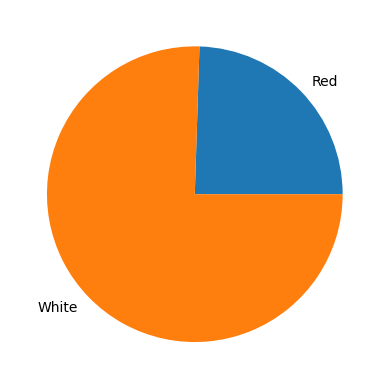

In [16]:
labels = 'Red', 'White'
sizes = [1589, 4898]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [32]:
display(red_wine.info())
display(white_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_label         1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality_label         4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


None

Text(0.5, 1.0, 'Red Wine Quality Label')

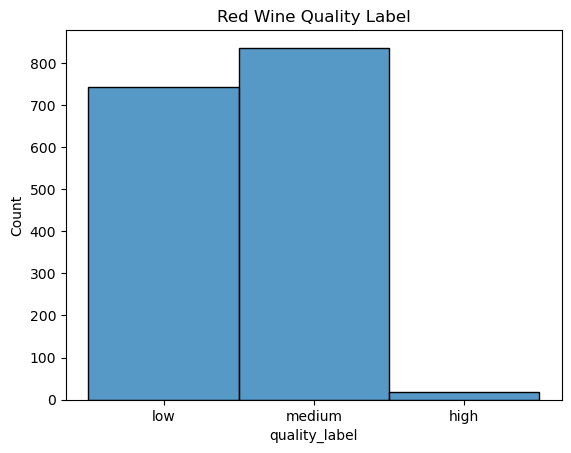

In [19]:
ax = sns.histplot(data=red_wine, x='quality_label')
ax.set_title('Red Wine Quality Label')

In [ ]:
quality_order = ['low', 'medium', 'high']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot for Red Wine
sns.histplot(data=red_wine, x='quality_label', ax=axes[0], cat_order=quality_order)
axes[0].set_title('Red Wine Quality')

# Plot for White Wine
sns.histplot(data=white_wine, x='quality_label', ax=axes[1], cat_order=quality_order)
axes[1].set_title('White Wine Quality')

plt.tight_layout()


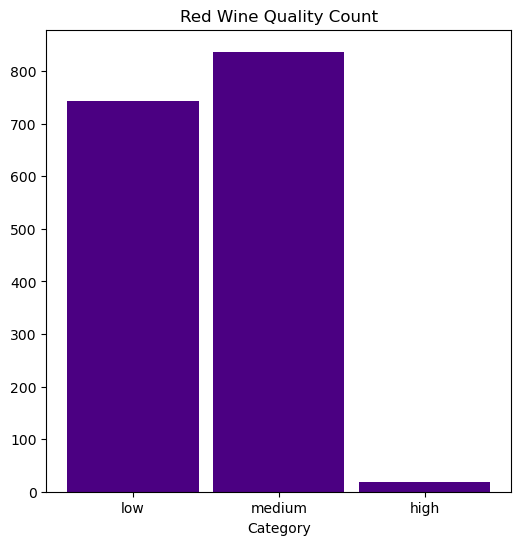

In [29]:
count_series = red_wine['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

x=count_series.index
y=count_series.values
cat_order = ['low', 'medium', 'high']
fig = plt.figure(figsize=(6,6))
plt.bar(x,y, width=0.9, color='indigo', tick_label=cat_order)
plt.title('Red Wine Quality Count')
plt.xlabel('Category')
plt.show()

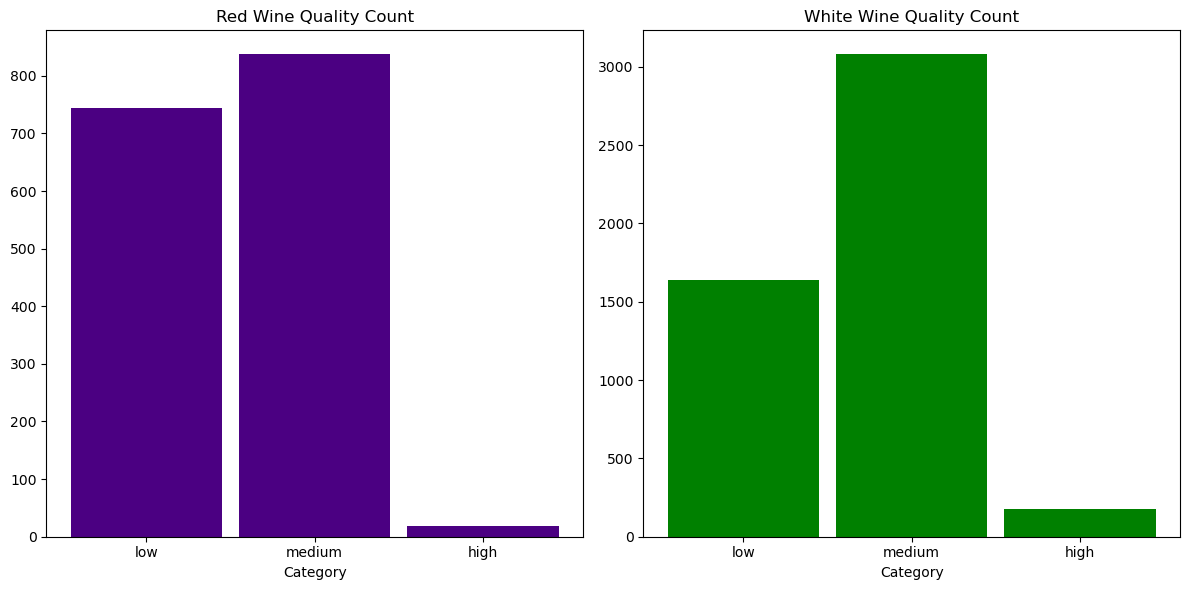

In [30]:
# Get counts for red wine
red_count_series = red_wine['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# Get counts for white wine
white_count_series = white_wine['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# x and y coordinates for red and white wine
x_red = red_count_series.index
y_red = red_count_series.values

x_white = white_count_series.index
y_white = white_count_series.values

# Initialize subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for Red Wine
axes[0].bar(x_red, y_red, width=0.9, color='indigo')
axes[0].set_title('Red Wine Quality Count')
axes[0].set_xlabel('Category')

# Bar chart for White Wine
axes[1].bar(x_white, y_white, width=0.9, color='green')
axes[1].set_title('White Wine Quality Count')
axes[1].set_xlabel('Category')

# Display plots
plt.tight_layout()
plt.show()


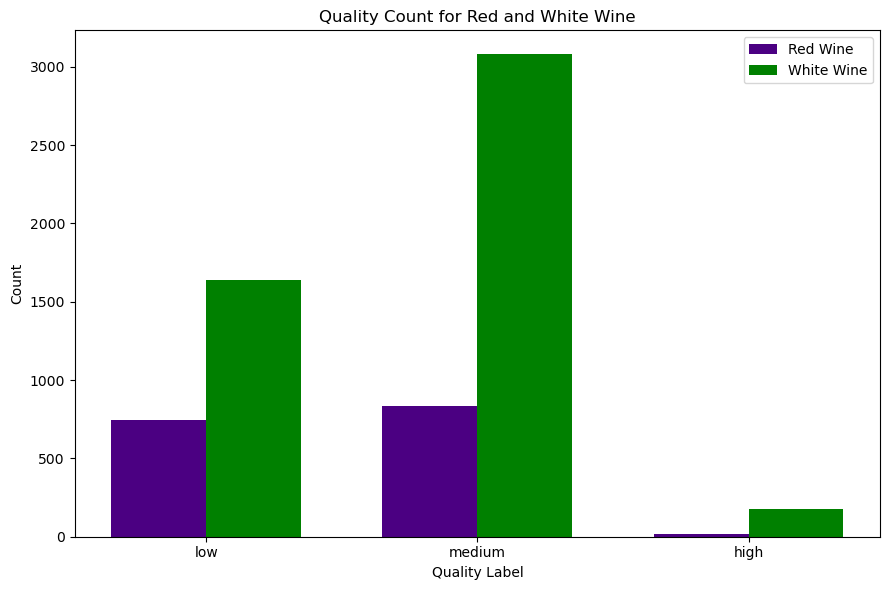

In [31]:
# Get counts for red wine
red_count_series = red_wine['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# Get counts for white wine
white_count_series = white_wine['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# x and y coordinates for red and white wine
labels = ['low', 'medium', 'high']
red_counts = red_count_series.values
white_counts = white_count_series.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9, 6))

# Plot the bars
rects1 = ax.bar(x - width/2, red_counts, width, label='Red Wine', color='indigo')
rects2 = ax.bar(x + width/2, white_counts, width, label='White Wine', color='green')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_title('Quality Count for Red and White Wine')
ax.set_xlabel('Quality Label')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [33]:
display(all_wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


None

Text(0, 0.5, 'Alcohol Content (%)')

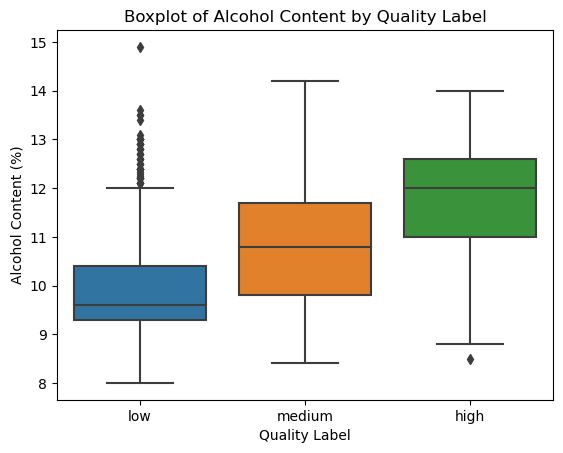

In [35]:
sns.boxplot(x='quality_label', y='alcohol', data=all_wine)
plt.title('Boxplot of Alcohol Content by Quality Label')
plt.xlabel('Quality Label')
plt.ylabel('Alcohol Content (%)')

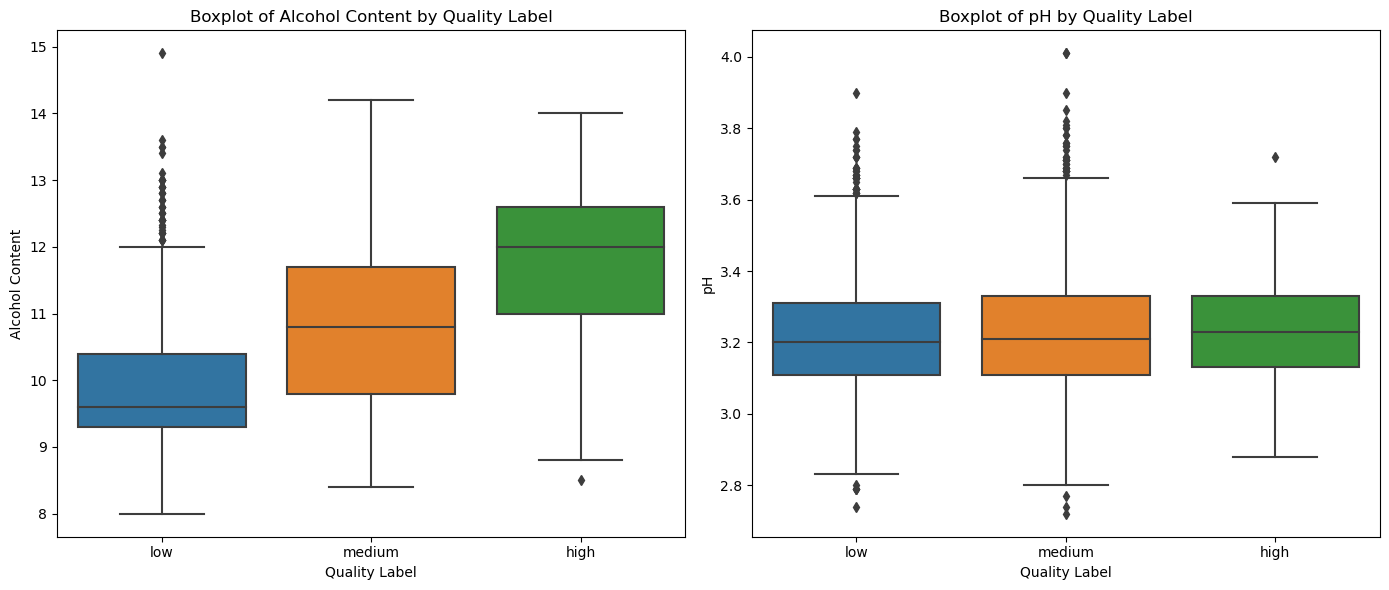

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='quality_label', y='alcohol', data=all_wine, ax=axes[0])
axes[0].set_title('Boxplot of Alcohol Content by Quality Label')
axes[0].set_xlabel('Quality Label')
axes[0].set_ylabel('Alcohol Content')

sns.boxplot(x='quality_label', y='pH', data=all_wine, ax=axes[1])
axes[1].set_title('Boxplot of pH by Quality Label')
axes[1].set_xlabel('Quality Label')
axes[1].set_ylabel('pH')

plt.tight_layout()
plt.show()
